In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
import pandas as pd
from chart_studio import plotly as py #visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# 깨짐 방지를 위한 Font 지정
import os
if os.name =='nt' : 
    font_family = "Malgun Gothic"
else :
    font_family = "AppleGothic"

# 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

In [2]:
# 결측값 처리

In [3]:
data = pd.read_csv('C:/Users/user/공공빅데이터_프로젝트/부산시_수소차대수.csv', encoding = "euc-kr")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구     730 non-null    object 
 1   읍면동     730 non-null    object 
 2   차종      730 non-null    object 
 3   수소차대수   136 non-null    float64
dtypes: float64(1), object(3)
memory usage: 22.9+ KB


In [5]:
missing_data = pd.DataFrame(data)
missing_data.head()

,시군구,읍면동,차종,수소차대수
0,강서구,강동동,승용,7.0
1,강서구,강동동,승합,NaN
2,강서구,강동동,특수,NaN
3,강서구,강동동,화물,NaN
4,강서구,구랑동,승용,2.0


In [6]:
missing_data.isnull()

,시군구,읍면동,차종,수소차대수
0,False,False,False,False
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,False
...,...,...,...,...
725,False,False,False,True
726,False,False,False,True
727,False,False,False,False
728,False,False,False,True


In [7]:
missing_data.isnull().sum()

시군구        0
읍면동        0
차종         0
수소차대수    594
dtype: int64

In [8]:
missing_data.dropna(axis=0)

,시군구,읍면동,차종,수소차대수
0,강서구,강동동,승용,7.0
4,강서구,구랑동,승용,2.0
8,강서구,녹산동,승용,2.0
16,강서구,대저1동,승용,4.0
20,강서구,대저2동,승용,10.0
...,...,...,...,...
711,해운대구,송정동,승용,2.0
715,해운대구,우동,승용,35.0
719,해운대구,재송동,승용,30.0
723,해운대구,좌동,승용,33.0


In [9]:
# 데이터 정리

In [10]:
dat = missing_data.pivot_table(
    missing_data, index = ['시군구'], aggfunc=np.sum)

dat.head()

,수소차대수
시군구,
강서구,178.0
금정구,85.0
기장군,111.0
남구,102.0
동구,31.0


In [11]:
dat.columns

Index(['수소차대수'], dtype='object')

In [128]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 강서구 to 해운대구
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   수소차대수   16 non-null     float64
dtypes: float64(1)
memory usage: 256.0+ bytes


In [12]:
dat

,수소차대수
시군구,
강서구,178.0
금정구,85.0
기장군,111.0
남구,102.0
동구,31.0
동래구,109.0
부산진구,191.0
북구,115.0
사상구,113.0


In [13]:
dat.to_csv("부산시구별수소차대수.csv", index = False, encoding = "EUC-KR")

In [129]:
dat_sort = dat.sort_values(by = '수소차대수', ascending = False)
dat_sort.head(16)

,수소차대수
시군구,
부산진구,191.0
강서구,178.0
해운대구,155.0
사하구,124.0
북구,115.0
사상구,113.0
기장군,111.0
동래구,109.0
남구,102.0


In [130]:
# 히트맵 시각화

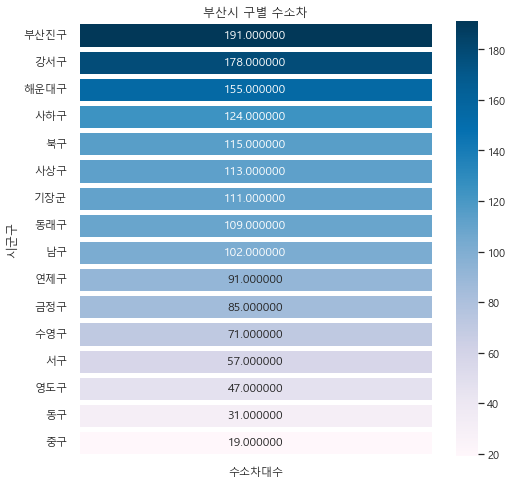

In [131]:
plt.figure(figsize = (8,8))
sns.heatmap(dat_sort, annot = True, fmt = 'f', linewidths = 5, cmap = "PuBu" )
plt.title("부산시 구별 수소차")
plt.show()

In [136]:
dat_sort.columns

Index(['수소차대수'], dtype='object')